In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the dataset
ds=pd.read_csv('Salary_Data.csv')
ds

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [4]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


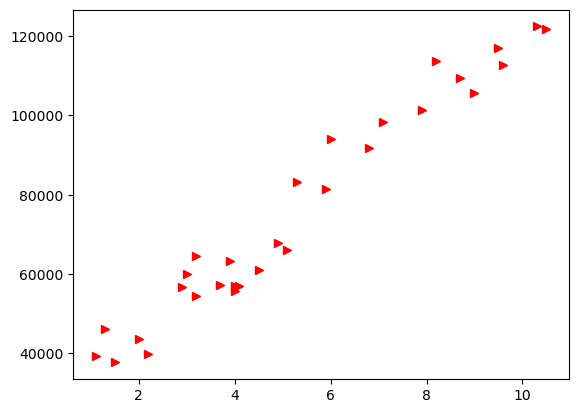

In [6]:
x=ds['YearsExperience']
y=ds['Salary']
plt.plot(x,y,'>',color='r')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

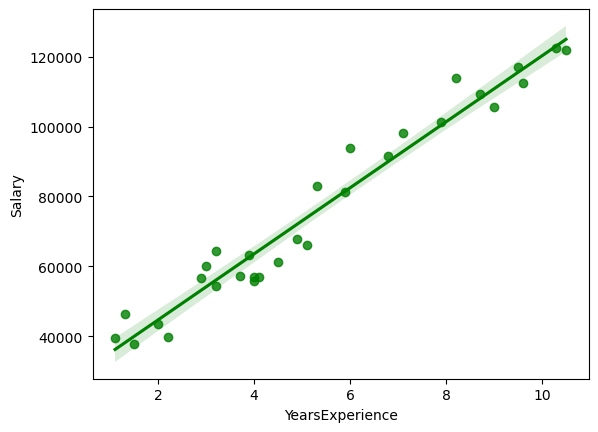

In [7]:
sns.regplot(x=x,y=y,color='g')

In [8]:
# split the dataset to x and y axis
x=ds.iloc[:,0:1].values
y=ds.iloc[:,-1].values

In [9]:
print(' X is:\n ',x)
print('Y is:\n',y)

 X is:
  [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
Y is:
 [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [10]:
# split the data into x_trin,x_test,y_train,y_test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
print('X_train\n',x_train)
print('X_test\n',x_test)
print('Y_train\n',y_train)
print('Y_test\n',y_test)

X_train
 [[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
X_test
 [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]
Y_train
 [112635  55794  83088 101302  56642  66029  64445  61111 113812  91738
  46205 121872  60150  39891  81363  93940  57189  54445 105582  43525
  39343  98273  67938  56957]
Y_test
 [ 37731 122391  57081  63218 116969 109431]


In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [13]:
# lets build our linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [14]:
print('b=\n',model.intercept_)
print('a=\n',model.coef_)

b=
 26780.099150628186
a=
 [9312.57512673]


In [15]:
# lets predict both x_test and x_trian
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [16]:
print('y_test_pred\n',y_pred_test)
print('y_train_pred\n',y_pred_train)

y_test_pred
 [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
y_train_pred
 [116180.82036723  64030.39965754  76136.74732229 100349.44265179
  53786.56701814  74274.23229695  56580.33955616  68686.68722091
 103143.21518981  90105.61001239  38886.44681538 124562.13798128
  54717.82453082  47267.76442943  81724.29239833  82655.549911
  61236.62711953  56580.33955616 110593.27529119  45405.24940409
  37023.93179003  92899.38255041  72411.7172716   64030.39965754]


In [17]:
df=pd.DataFrame({'actual':y_test,'predicted':y_pred_test})
df

,actual,predicted
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


In [18]:
# lets check how well our model performed
from sklearn import metrics

print('RMSE of testing data\n',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('R-squared of testing data\n',metrics.r2_score (y_test,y_pred_test))

RMSE of testing data
 3580.979237321345
R-squared of testing data
 0.988169515729126


In [19]:
# lets check the performance of our training data
print('RMSE of training data\n',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print('R-squared of training data\n',metrics.r2_score (y_train,y_pred_train))

RMSE of training data
 6012.459573099956
R-squared of training data
 0.9411949620562126


In [20]:
bias=3580.9792373-6012.4595730
variance=98.816-94.4595
print('bias = ',bias)
print('variance',variance)

bias =  -2431.4803357
variance 4.356499999999997


In [21]:
# save the model with joblib
import joblib

joblib.dump(model,'model.pkl')

['model.pkl']

In [22]:
# tuning with algorithm with hyper parameters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m 

In [23]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x= st_x.fit_transform(x)

In [24]:
models=[]   # model[] is empty
scores=[]   #scores[] is empty

In [25]:
# GrdidSearchCV- RidgeRegressor
parameters = {'alpha':[0.0001,0.001,0.01,0.1]}        
c1 = Ridge()
grid = GridSearchCV(c1, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c1)   #models[c1]
scores.append(grid.best_score_)   #scores[0.8853679599908248]

{'alpha': 0.1}
Ridge(alpha=0.1)
-2.1150391018474712


In [52]:
# GridSearchCV- LassoRegression
parameters = {'alpha':[0.0001,0.001,0.01,0.1]}        
c2 = Lasso()
grid = GridSearchCV(c2, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
models.append(c2)   #models[c1,c2]
scores.append(grid.best_score_)   #scores[0.8863844264592868]

{'alpha': 0.1}
Lasso(alpha=0.1)
-2.118357343764113


In [54]:
# GridSearchCV- DecisionTreeRegressor
parameters = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter':['best', 'random']
              }                  
c3 = DecisionTreeRegressor()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c3)   #models[c1]
scores.append(grid.best_score_)   #scores[0.8863844264592868]()




{'criterion': 'squared_error', 'splitter': 'best'}
DecisionTreeRegressor()
-0.4742278593628778


In [60]:
# GridSearchCV- Support Vector Regressor(SVR)
parameters = {'C': [0.01, 0.05],
              'degree': [2, 3],
              'gamma':[0.001, 0.01],
              'kernel': ['rbf']
              }        
c4 = SVR()
grid = GridSearchCV(c4, parameters, cv=10)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c4)   #models[c1,c2,c3]
scores.append(grid.best_score_) 


{'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=0.05, degree=2, gamma=0.01)
-8.68663261784927


In [62]:
# GrdidSearchCV- KNeighborsRegressor(KNN)¶
parameters = {'n_neighbors': range(30),
              'metric':['manhattan','euclidean']}        
c5 = KNeighborsRegressor()  
grid = GridSearchCV(c5, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c5)     #models[c1,c2,c3,c4]
scores.append(grid.best_score_) 

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 848, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py", line 242, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
                ^^^^^^^^^^^^^^^^^^^

{'metric': 'manhattan', 'n_neighbors': 1}
KNeighborsRegressor(metric='manhattan', n_neighbors=1)
-0.4742278593628778


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 848, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py", line 242, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
                ^^^^^^^^^^^^^^^^^^^

In [66]:
# GrdidSearchCV- RandomForestRegressor
parameters = {'n_estimators':range(1,20),
              'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}        
c6 = RandomForestRegressor()  
grid = GridSearchCV(c6, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


models.append(c6)      #models[c1,c2,c3,c4,c5]
scores.append(grid.best_score_) 

{'criterion': 'poisson', 'n_estimators': 2}
RandomForestRegressor(criterion='poisson', n_estimators=2)
-0.1072587097670322


In [68]:
# GridSearchCV- LinearRegression
parameters = {'n_jobs':['-1','1'],
              'fit_intercept':[True,False]}        
c7 = LinearRegression()  
grid = GridSearchCV(c7, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


models.append(c7)      #models[c1,c2,c3,c4,c5]
scores.append(grid.best_score_) 


ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_jobs' parameter of LinearRegression must be None or an instance of 'int'. Got '-1' instead.

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_jobs' parameter of LinearRegression must be None or an instance of 'int'. Got '1' instead.


In [70]:
result_data=pd.DataFrame({"Models":models,"Score":scores})
print(result_data)

                    Models      Score
0                  Ridge()  -2.115039
1                  Lasso()  -2.118357
2  DecisionTreeRegressor()  -0.474228
3                    SVR() -41.537874
4                    SVR()  -8.686633
5                    SVR()  -8.686633
6    KNeighborsRegressor()  -0.474228
7  RandomForestRegressor()  -0.089838
8  RandomForestRegressor()  -0.107259
